# Part A
## Problem 1

In [61]:
import numpy as np
from numba import jit

# define parameters
beta = 0.98
R = 1/beta
sigma = 0.5
T = 80

# define grid A
a_max = 100
a_grid = np.linspace(0.1,a_max,num=a_max*10)

# define utility function
@jit(nopython=True)
def utility(c):
    return (c**(1-(1/sigma)))/(1-(1/sigma))

def optimal_value_and_consumption(a_grid, beta, R, sigma, T):
    # set up empty arrays for value functions and consumption rules
    V = np.zeros((T+1,len(a_grid)))
    C = np.zeros((T+1,len(a_grid)))
    a_utility = utility(a_grid)
    V[T,:] = a_utility.transpose()
    C[T,:] = a_grid.transpose()
    
    # iterate backwards from stage T
    for t in range(T-1,0-1,-1):
        for i, a in enumerate(a_grid):
            v_candidates = np.zeros(len(a_grid))
            c_candidates = np.zeros(len(a_grid))
            for ip, ap in enumerate(a_grid):
                c = a - ap/R
                c_candidates[ip] = c
                if c < 0:
                    v_candidates[ip] = -1e10
                else:
                    v_candidates[ip] = utility(c) + beta * V[t+1, ip]
            V[t,i] = np.max(v_candidates)
            C[t,i] = c_candidates[np.argmax(v_candidates)]
    
    return V, C


## Problem 2

In [62]:
# compute the problem with [a_1, a_N] and [a_1, a*]
a_star = a_max // 2
a_grid_star = np.linspace(0,a_star,num=a_star*10)

V_N, C_N = optimal_value_and_consumption(a_grid, beta, R, sigma, T)
V_star, C_star = optimal_value_and_consumption(a_grid_star, beta, R, sigma, T)



Text(0.5, 0, 'Asset a')

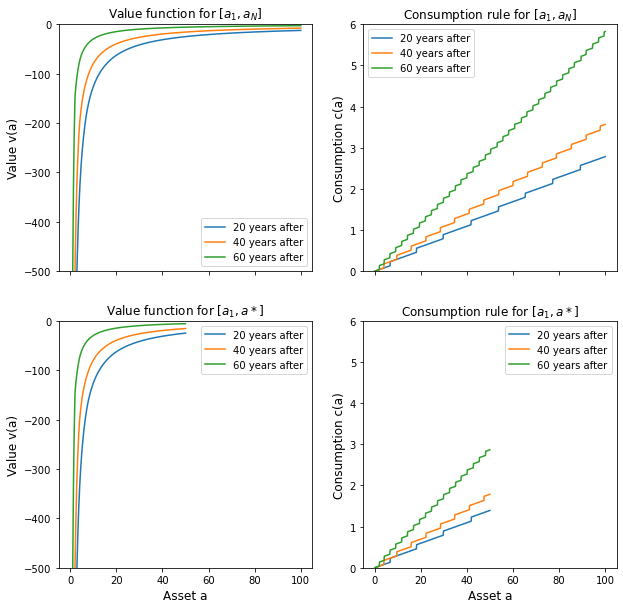

In [94]:
import matplotlib.pyplot as plt

# make 2x2 plots for consumptions and values
fig, axs = plt.subplots(2, 2, figsize = (10,10), sharex=True)

axs[0, 0].plot(a_grid, V_N[20,:], label = "20 years after")
axs[0, 0].plot(a_grid, V_N[40,:], label = "40 years after")
axs[0, 0].plot(a_grid, V_N[60,:], label = "60 years after")
axs[0, 0].set_title("Value function for $[a_1,a_N]$")
axs[0, 0].set_ylim([-500, 0])
axs[0, 0].set_ylabel("Value v(a)", fontsize=12)
axs[0, 0].legend()

axs[0, 1].plot(a_grid, C_N[20,:], label = "20 years after")
axs[0, 1].plot(a_grid, C_N[40,:], label = "40 years after")
axs[0, 1].plot(a_grid, C_N[60,:], label = "60 years after")
axs[0, 1].set_title("Consumption rule for $[a_1,a_N]$")
axs[0, 1].set_ylim([0, 6])
axs[0, 1].set_ylabel("Consumption c(a)", fontsize=12)
axs[0, 1].legend()

axs[1, 0].plot(a_grid_star, V_star[20,:], label = "20 years after")
axs[1, 0].plot(a_grid_star, V_star[40,:], label = "40 years after")
axs[1, 0].plot(a_grid_star, V_star[60,:], label = "60 years after")
axs[1, 0].set_title("Value function for $[a_1,a*]$")
axs[1, 0].set_ylim([-500, 0])
axs[1, 0].set_ylabel("Value v(a)", fontsize=12)
axs[1, 0].legend()
axs[1, 0].set_xlabel("Asset a", fontsize=12)

axs[1, 1].plot(a_grid_star, C_star[20,:], label = "20 years after")
axs[1, 1].plot(a_grid_star, C_star[40,:], label = "40 years after")
axs[1, 1].plot(a_grid_star, C_star[60,:], label = "60 years after")
axs[1, 1].set_title("Consumption rule for $[a_1,a*]$")
axs[1, 1].set_ylim([0, 6])
axs[1, 1].set_ylabel("Consumption c(a)", fontsize=12)
axs[1, 1].legend()
axs[1, 1].set_xlabel("Asset a", fontsize=12)




**Key patterns observed in the plots:**
* The value functions are in the power form and the consumption rules are approximately linear.
* For the same amount of asset a, both the value and consumption will be higher for a larger T, which shows that given the same amount of asset, people at older age can get more value and consume more than the younger age.
* For a smaller upper bound of the grid, the information about the corresponding values and consumptions will be lost for the larger assets. However, known the trends for value functions and consumption rules from the lower values for asset, they could be extrapolated instead of directly obtained from the model to save the required computational time.


## Problem 3a

In [64]:
# calculate initial wealth a0
a0 = 0
y = np.zeros((T+1,1))
for t in range(0, 45):
    y[t] = (-3 + 0.25 * (t + 20) - 0.0025 * (t + 20) ** 2)
    a0 += R ** (-t) * y[t]

print("a0 =", a0)

a0 = [75.3121595]


In [65]:
# compute optimal consumption sequence and path for bonds
opt_a = np.zeros((T+1,1))
opt_c = np.zeros((T+1,1))
opt_b = np.zeros((T+1,1))

opt_a[0] = a0

for t in range(0,T+1):
    # use a_grid and C_N obtained from problem 2
    if t != 0:
        opt_a[t] = R * (opt_a[t-1] - opt_c[t-1])
    i = np.argmin(abs(a_grid-opt_a[t]))
    opt_c[t] = C_N[t,i]
    opt_b[t] = R * (opt_b[t-1] + y[t] - opt_c[t])
    
    

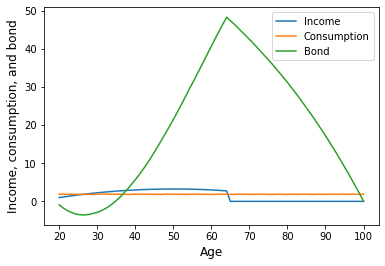

In [66]:
# plot income, consumption, and bond
age = np.arange(20, 20+T+1)
plt.plot(age, y, label = "Income")
plt.plot(age, opt_c, label = "Consumption")
plt.plot(age, opt_b, label = "Bond")
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income, consumption, and bond', fontsize=12)
plt.legend()

## Problem 3b

In [67]:
# define utility function
@jit(nopython=True)
def utility(c):
    return (c**(1-(1/sigma)))/(1-(1/sigma))

def optimal_value_and_consumption_with_constraint(a_grid, beta, R, sigma, T, y):
    # set up empty arrays for value functions and consumption rules
    V = np.zeros((T+1,len(a_grid)))
    C = np.zeros((T+1,len(a_grid)))
    a_utility = utility(a_grid)
    V[T,:] = a_utility.transpose()
    C[T,:] = a_grid.transpose()
    
    # set up lower bound for a
    a_low = np.zeros((T+1,1))
    for t in range(0,T+1):
        for tau in range(0,T-t+1):
            a_low[t] += R ** (-tau) * y[t+tau]
    
    # iterate backwards from stage T
    for t in range(T-1,0-1,-1):
        for i, a in enumerate(a_grid):
            v_candidates = np.zeros(len(a_grid))
            c_candidates = np.zeros(len(a_grid))
            for ip, ap in enumerate(a_grid):
                c = a - ap/R
                c_candidates[ip] = c
                if c < 0 or ap < a_low[t+1]:
                    v_candidates[ip] = -1e10
                else:
                    v_candidates[ip] = utility(c) + beta * V[t+1, ip]
            V[t,i] = np.max(v_candidates)
            C[t,i] = c_candidates[np.argmax(v_candidates)]
    
    return V, C

In [68]:
# compute optimal consumption sequence and path for bonds
V, C = optimal_value_and_consumption_with_constraint(a_grid, beta, R, sigma, T, y)

opt_a = np.zeros((T+1,1))
opt_c = np.zeros((T+1,1))
opt_b = np.zeros((T+1,1))

opt_a[0] = a0

for t in range(0,T+1):
    # use a_grid and C_N obtained from problem 2
    if t != 0:
        opt_a[t] = R * (opt_a[t-1] - opt_c[t-1])
    i = np.argmin(abs(a_grid-opt_a[t]))
    opt_c[t] = C[t,i]
    opt_b[t] = R * (opt_b[t-1] + y[t] - opt_c[t])

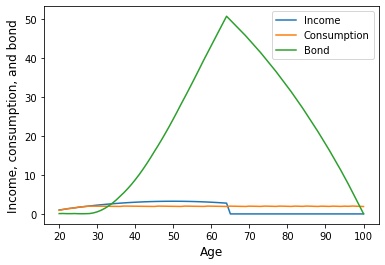

In [69]:
# plot income, consumption, and bond
plt.plot(age, y, label = "Income")
plt.plot(age, opt_c, label = "Consumption")
plt.plot(age, opt_b, label = "Bond")
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income, consumption, and bond', fontsize=12)
plt.legend()

## Problem 4

In [72]:
# define parameters
beta = 0.98
R = 1/beta
sigma = 0.5
T_1 = 1000
T_2 = T_1 + 100

# define grid A
a_max = 100
a_grid = np.linspace(0.1,a_max,num=a_max*10)

# define utility function
@jit(nopython=True)
def utility(c):
    return (c**(1-(1/sigma)))/(1-(1/sigma))

def optimal_value_and_consumption_infinite(a_grid, beta, R, sigma, T):
    # set up empty arrays for value functions and consumption rules
    V = np.zeros((T+1,len(a_grid)))
    C = np.zeros((T+1,len(a_grid)))
    a_utility = utility(a_grid)
    V[T,:] = a_utility.transpose()
    C[T,:] = a_grid.transpose()
    
    # iterate backwards from stage T
    for t in range(T-1,0-1,-1):
        for i, a in enumerate(a_grid):
            v_candidates = np.zeros(len(a_grid))
            c_candidates = np.zeros(len(a_grid))
            for ip, ap in enumerate(a_grid):
                c = a - ap/R
                c_candidates[ip] = c
                if c < 0:
                    v_candidates[ip] = -1e10
                else:
                    v_candidates[ip] = utility(c) + beta * V[t+1, ip]
            V[t,i] = np.max(v_candidates)
            C[t,i] = c_candidates[np.argmax(v_candidates)]
    
    return V, C

In [73]:
# compute for large T_1 and even larger T_2
V_1, C_1 = optimal_value_and_consumption_infinite(a_grid, beta, R, sigma, T_1)
V_2, C_2 = optimal_value_and_consumption_infinite(a_grid, beta, R, sigma, T_2)

In [80]:
# calculate bond for T_1
a0 = 0
y = np.ones((T_1+1,1))
for t in range(0, T_1+1):
    a0 += R ** (-t) * y[t]

B_1 = R * (a_grid - C_1[0,:]) - a0
    

# calculate bond for T_2
a0 = 0
y = np.ones((T_2+1,1))
for t in range(0, T_2+1):
    a0 += R ** (-t) * y[t]

B_2 = R * (a_grid - C_2[0,:]) - a0

Text(0.5, 0, 'Asset a')

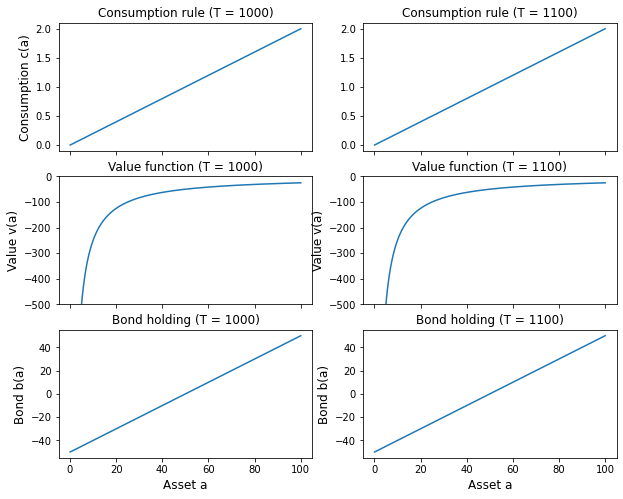

In [97]:
# make 3x2 plots for consumptions, bonds, and values
fig, axs = plt.subplots(3, 2, figsize = (10,8), sharex=True)
plt.xlabel("Asset a")

axs[0, 0].plot(a_grid, C_1[0,:])
axs[0, 0].set_title("Consumption rule (T = 1000)")
axs[0, 0].set_ylabel("Consumption c(a)", fontsize=12)

axs[0, 1].plot(a_grid, C_2[0,:])
axs[0, 1].set_title("Consumption rule (T = 1100)")
axs[0, 0].set_ylabel("Consumption c(a)", fontsize=12)

axs[1, 0].plot(a_grid, V_1[0,:])
axs[1, 0].set_title("Value function (T = 1000)")
axs[1, 0].set_ylabel("Value v(a)", fontsize=12)
axs[1, 0].set_ylim([-500, 0])

axs[1, 1].plot(a_grid, V_2[0,:])
axs[1, 1].set_title("Value function (T = 1100)")
axs[1, 1].set_ylabel("Value v(a)", fontsize=12)
axs[1, 1].set_ylim([-500, 0])

axs[2, 0].plot(a_grid, B_1)
axs[2, 0].set_title("Bond holding (T = 1000)")
axs[2, 0].set_ylabel("Bond b(a)", fontsize=12)
axs[2, 0].set_xlabel("Asset a", fontsize=12)

axs[2, 1].plot(a_grid, B_2)
axs[2, 1].set_title("Bond holding (T = 1100)")
axs[2, 1].set_ylabel("Bond b(a)", fontsize=12)
axs[2, 1].set_xlabel("Asset a", fontsize=12)

## Problem 5

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [30]:
# define parameters
beta = 0.98 # or beta = 0.90
R = 1 / beta
sigma = 0.5
T = 100

In [31]:
# define grid
b_max = 5
b_grid = np.linspace(0, b_max, num = 100)

In [32]:
# Define income process
y = np.zeros((T,1))
# Set y equal to 1 if t is even and 0 if t is odd
y[::2] = 1
y[1::2] = 0

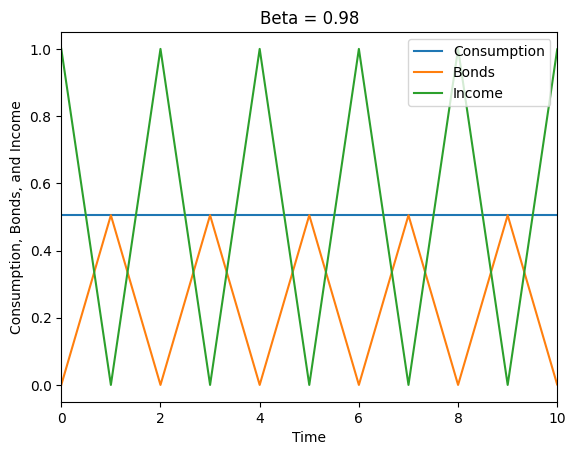

In [33]:
@jit(nopython=True)

# define utility function, this is the flow utility accruing to consumption
def util(c):
    return (c ** (1 - (1 / sigma))) / (1 - (1 / sigma))

# Calculate consumption given current bonds, income, and future choice of bonds. 
def cons(b, y, b_prime): 
    return y + b - (R ** (-1)) * b_prime

# In the final period, the individual consumes their bonds and income, 
# hence we can calculate the value function directly.
## Initialize V
V = np.zeros((T, len(b_grid)))
V[T-1, :] = util(y[T-1] + b_grid)
# Similarly, we can also express consumption directly. 
## Initialize C
C = np.zeros((T, len(b_grid)))
C[T-1, :] = y[T-1] + b_grid
# Similarly, and final period choice of bonds. 
## Initialize B
B = np.zeros((T, len(b_grid)))
B[T-1, :] = 0

# Note that V and C are matrices. Each row corresponds to a period,
# and each column corresponds to a fixed value of b.

# Define an objective function, which is the sum of utility 
# from consumption and the discounted value of V in the next period.
# We prevent negative consumpption. 
def TwoPeriodUtility(b, b_prime, t):

    # Calculate flow utility given b and b_prime
    c = cons(b, y[t], b_prime)
    u = util(c)
    # Calculate the value of V in the next period
    ## First, find the index of b_prime in the grid
    i = np.where(b_grid == b_prime)[0][0]
    ## Then, use the index to find the value of V in the next period
    continuation = V[t+1, i]
    ## rule out negative consumption
    negative_consumption_flag = (y[t] + b - (R ** (-1)) * b_prime) < 0
    negative_consumption_value = -9e10 * negative_consumption_flag
    ## return value
    return u + beta * continuation + negative_consumption_value

# Induct backwards from period T-2 to 0. 
# In each period t, we find the optimal choice of b_prime for each b.
# We then use this to calculate the value of V in period t.
for t in range(T-2, -1, -1):
    for i, b in enumerate(b_grid):
        # Find the optimal choice of b_prime for each b
        b_prime_opt = b_grid[np.argmax([TwoPeriodUtility(b, b_prime, t) for b_prime in b_grid])]
        # Find the value of V for each b
        V[t, i] = TwoPeriodUtility(b, b_prime_opt, t)
        # Find the value of C for each b
        C[t, i] = cons(b, y[t], b_prime_opt)
        # Find the value of B for each b
        B[t, i] = b_prime_opt

# Find the optimal path of bond holdings, starting with bonds b0
b0 = 0
b_opt = np.zeros((T, 1))
b_opt[0] = b0
for t in range(1, T):
    i = np.where(b_grid == b_opt[t-1])[0][0]
    b_opt[t] = B[t-1, i]


# Find the optimal path of consumption, starting with bonds b0
c_opt = np.zeros((T, 1))
c_opt[0] = cons(b0, y[0], b_opt[1])
for t in range(1, T-1):
    c_opt[t] = cons(b_opt[t], y[t], b_opt[t+1])

# Plot the path of consumption, the path of bond holdings, 
# and the path of income all on the same graph. 
plt.plot(c_opt, label = 'Consumption')
plt.plot(b_opt, label = 'Bonds')
plt.plot(y, label = 'Income')
plt.legend()
## Add a title
plt.title('Beta = 0.98')
## Add an x-axis label
plt.xlabel('Time')
## Add a y-axis label
plt.ylabel('Consumption, Bonds, and Income')
plt.xlim(0, 10)
plt.show()

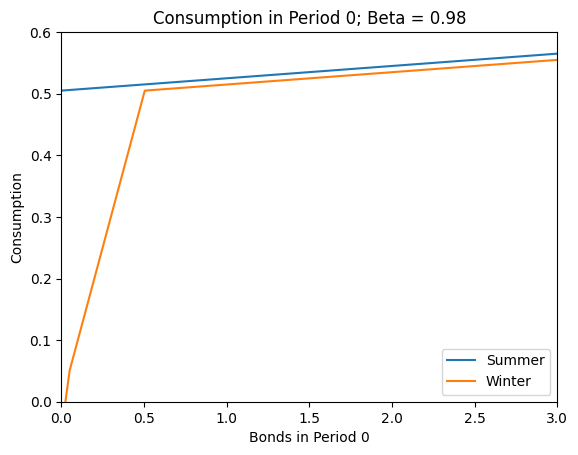

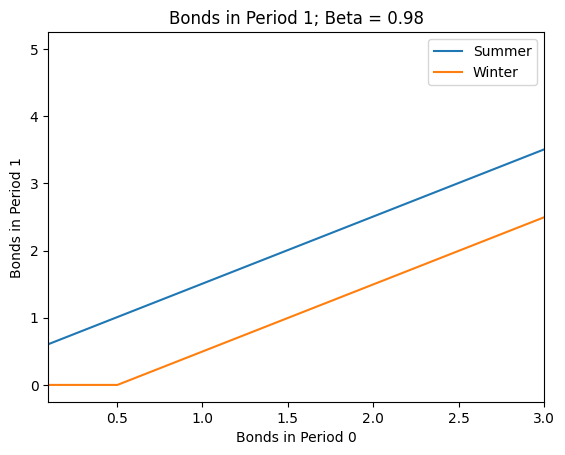

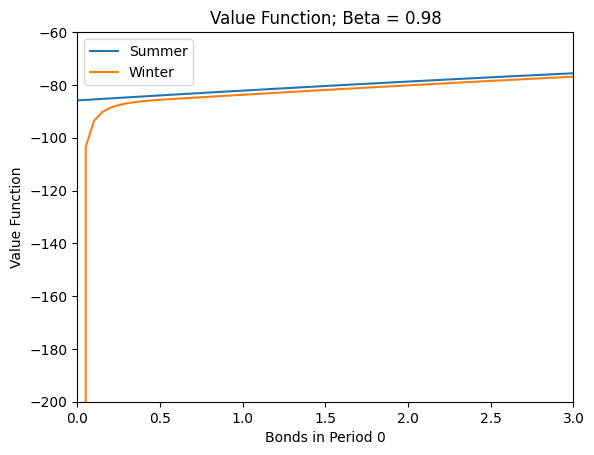

In [34]:
# Plot C[0,:] and b_grid on the same graph.
plt.plot(b_grid, C[0,:], label = 'Summer')
plt.plot(b_grid, C[1,:], label = 'Winter')
## Add a title
plt.title('Consumption in Period 0; Beta = 0.98')
## Add an x-axis label
plt.xlabel('Bonds in Period 0')
## Add a y-axis label
plt.ylabel('Consumption')
## Restrict to certain values of the x-axis
plt.xlim(0, 3)
plt.ylim(0, 0.6)
## Add legend
plt.legend()
plt.show()

# Plot C[0,:] and b_grid on the same graph.
plt.plot(b_grid, B[0,:], label = 'Summer')
plt.plot(b_grid, B[1,:], label = 'Winter')
## Add a title
plt.title('Bonds in Period 1; Beta = 0.98')
## Add an x-axis label
plt.xlabel('Bonds in Period 0')
## Add a y-axis label
plt.ylabel('Bonds in Period 1')
## Restrict to certain values of the x-axis
plt.xlim(0.1, 3)
## Add legend
plt.legend()
plt.show()

# Plot V[0,:] and b_grid on the same graph.
plt.plot(b_grid, V[0,:], label = 'Summer')
plt.plot(b_grid, V[1,:], label = 'Winter')
## Add a title
plt.title('Value Function; Beta = 0.98')
## Add an x-axis label
plt.xlabel('Bonds in Period 0')
## Add a y-axis label
plt.ylabel('Value Function')
## Restrict to certain values of the x-axis
plt.ylim(-200, -60)
plt.xlim(0, 3)
## Add legend
plt.legend()
plt.show()